In [8]:
%pip install -Uqq fastai duckduckgo-search

Note: you may need to restart the kernel to use updated packages.


### Скачиваем картинки по героям и сохраняем в папку

In [9]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url

charracters_array = [
    'lion',
    'pudge',
    'axe',
    'lina',
    'tinker',
    # 'slark',
    'invoker',
    'zeus',
    # 'drow',
    'sniper',
    'mirana',
    'windranger',
    # 'phantom assassin',
    # 'templar assassin',
    'viper',
    'luna',
    # 'dazzle',
    # 'phantom lancer',
    # 'juggernaut',
    'bloodseeker',
    'riki',
    'clinkz',
    'weaver',
    # 'spectre',
]

for character in charracters_array:
    try:
        images = ddg_images(character + " dota2 photo", max_results=150)
        for idx, image in enumerate(images): 
            try:
                download_url(image['image'], Path('images')/f"{character}_{idx}.jpg", show_progress=False)
            except Exception as e:    
                print(f"Error on {character}_{idx}.jpg")
                print(e)
    except Exception as e:
        print(f"Error on {character}")
        print(e)    

/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


KeyboardInterrupt: 

Скрипт который удаляет corupted images

Второй image verifier. срабатывал когда  была такая ошибка
 
`OSError(\nOSError: image file is truncated (23 bytes not processed)\n`

In [20]:
import os
from PIL import Image

def is_image_corrupted(image_path):
    try:
        img = Image.open(image_path)
        img.verify()  # verify that it is, in fact an image
        # делаем to_thumb для нашего сайза, была ошибка которая на следующем этапе ломалась если не сделать
        Image.open(image_path).to_thumb(460, 460)
        return False
    except (IOError, SyntaxError) as e:
        return True

def clean_dataset(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if is_image_corrupted(file_path):
            print(f"Corrupted image detected and removed: {file_path}")
            os.remove(file_path)

clean_dataset('images')

Corrupted image detected and removed: images/lion_17.jpg


In [107]:
%cd ..

/notebooks


#### Подготавливаем к обучению
Инициализируем лейблы (y) через label_func и данные (x)

In [21]:
from fastai.vision.all import *

def label_func(title): return title.split("_")[0]

path = Path('images')

files = get_image_files(path)
len(files)

1371

Мы добавляем эти параметры, когда у нас более сложная задачка. Классификация нескольких классов например

`item_tfms=Resize(460), batch_tfms=aug_transforms(size=224)`

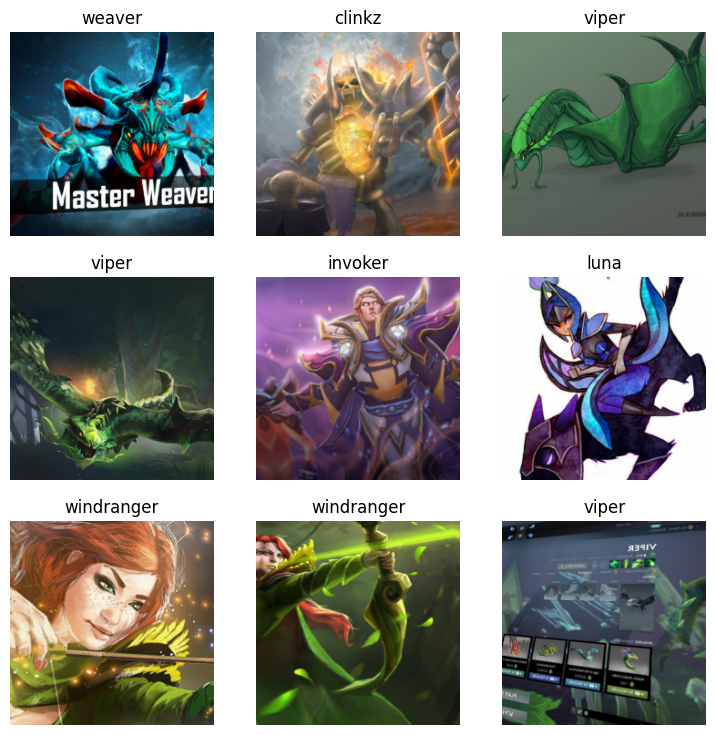

In [22]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize((460)), 
                                      batch_tfms=aug_transforms(size=(224)), method=ResizeMethod.Crop)

dls.show_batch()

In [23]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

# используем для того чтобы найти оптимальный learning rate, который используем для второго параметра в fine_tune
# learn.lr_find()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
learn.fine_tune(4, 0.001737800776027143)

epoch,train_loss,valid_loss,error_rate,time
0,3.676291,1.784061,0.558394,00:22


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,2.032924,1.266952,0.390511,00:21
1,1.603709,0.931630,0.277372,00:21
2,1.242771,0.776742,0.215328,00:21
3,1.035543,0.751268,0.204380,00:22


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


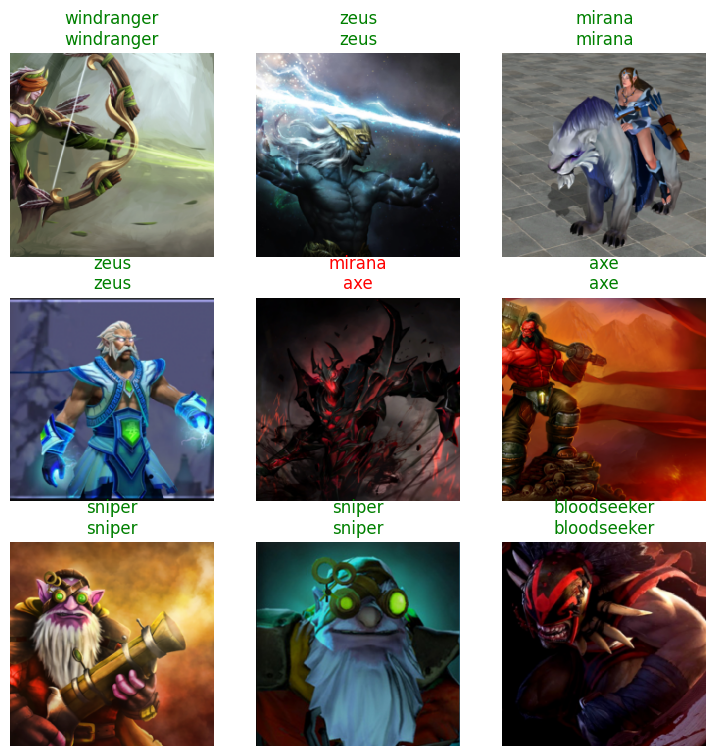

In [35]:
learn.show_results()

In [48]:
axe,_,probs  = learn.predict(PILImage.create('validate/axe.jpeg'))
pudge,_,probs  = learn.predict(PILImage.create('validate/pudge.jpeg'))
zeus,_,probs  = learn.predict(PILImage.create('validate/zeus.jpeg'))

print('Axe classification:', axe)
print('Pudge classification: ', pudge)
print('Zeus classification: ', zeus)

Axe:  axe
Pudge:  pudge
Zeus:  zeus
